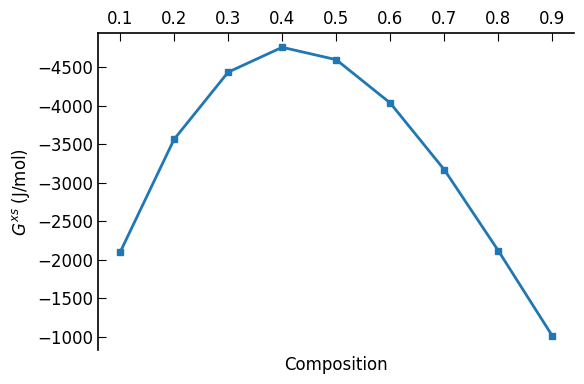

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Directories
DATA_DIR = Path("../data")
FIG_DIR = Path("../figures")
FIG_DIR.mkdir(exist_ok=True)

# APS-style defaults
plt.rcParams.update({
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 6,
    "ytick.major.size": 6,
    "axes.linewidth": 1.2,
    "font.size": 12,
})

# Load CSV
df = pd.read_csv(DATA_DIR / "Table2_Gxs.csv")
x = df.iloc[:, 0]
y = df.iloc[:, 1]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(x, y, 's-', lw=2, markersize=5)

ax.set_xlabel("Composition")
ax.set_ylabel(r"$G^{xs}$ (J/mol)")

# Conditional spine placement based on y-data
if y.max() > 0 and y.min() >= 0:
    # Positive y: standard
    ax.spines['bottom'].set_position(('outward',0))
    ax.spines['left'].set_position(('outward',0))
    
    # Show only left and bottom
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
elif y.min() < 0:
    # Negative y: x-axis at top, y-axis downward
    ax.spines['top'].set_position(('outward',0))
    ax.spines['left'].set_position(('outward',0))
    
    # Hide bottom and right
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Ticks
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')
    
    # Invert y-axis for downward direction
    ax.invert_yaxis()

# No grid
ax.grid(False)

fig.tight_layout()
fig.savefig(FIG_DIR / "gxs_vs_composition.png", dpi=300)
plt.show()
